<a href="https://colab.research.google.com/github/PKRaj007/PKRaj007/blob/main/_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name-Pramod Kumar(M-Tech 1st year)**


Roll No-21mcsa05
(Data Clustering)Assignment-2

In [ ]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**FOR REAL DATASET**

   iris dataset


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Real/iris2_k=3.txt', header=None)
df.head()

,0
0,70.0 1.0 4.0 130.0 322.0 0.0 2.0 109.0 0.0 2.4...
1,67.0 0.0 3.0 115.0 564.0 0.0 2.0 160.0 0.0 1.6...
2,57.0 1.0 2.0 124.0 261.0 0.0 0.0 141.0 0.0 0.3...
3,64.0 1.0 4.0 128.0 263.0 0.0 0.0 105.0 1.0 0.2...
4,74.0 0.0 2.0 120.0 269.0 0.0 2.0 121.0 1.0 0.2...


In [ ]:
df_X, labels = df.iloc[:, :-1], df.iloc[:, -1]
X, labels = np.array(df_X), np.array(labels)
X.shape, labels.shape

((150, 4), (150,))

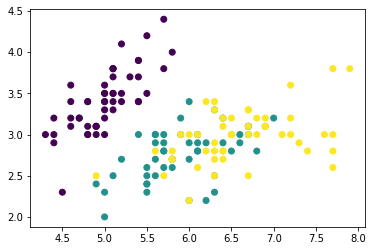

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

In [ ]:
N, f = X.shape
k = len(set(labels))

** single linkage**

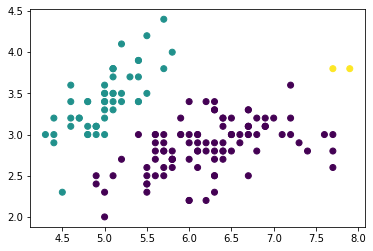

In [ ]:
S = AgglomerativeClustering(n_clusters=k, linkage='single')
S.fit(X)
predicted_labels = S.labels_
predicted_labels.shape
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels)
plt.show()

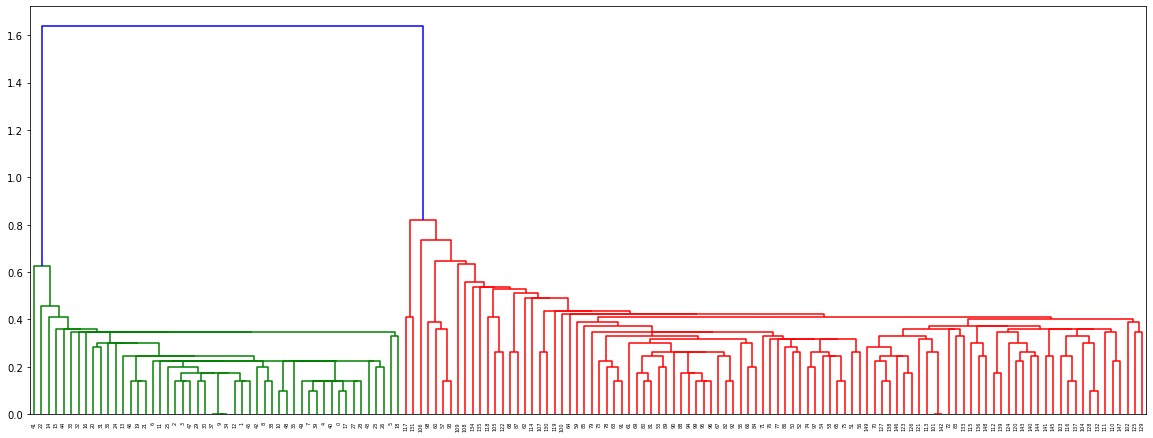

In [ ]:
link = linkage(X, method='single')
plt.figure(figsize=(20, 7.5))
dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
plt.show()

** complete linkage**


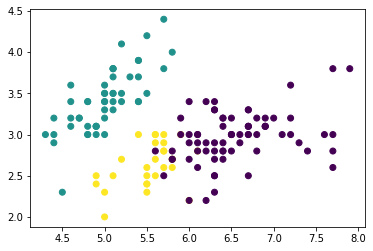

In [ ]:
 C = AgglomerativeClustering(n_clusters=k, linkage='complete')
 C.fit(X)
 predicted_labels = C.labels_
 predicted_labels.shape
 plt.scatter(X[:, 0], X[:, 1], c=predicted_labels)
 plt.show()

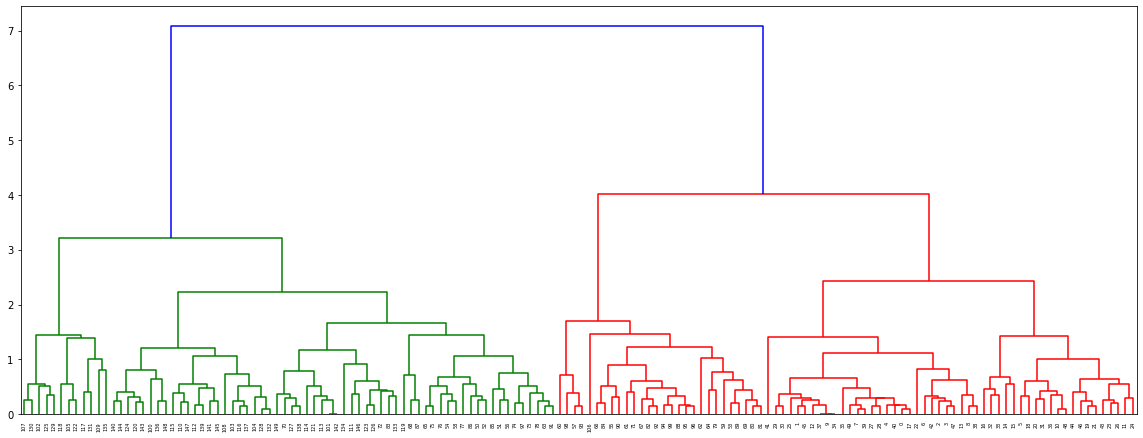

In [ ]:
link = linkage(X, method='complete')
plt.figure(figsize=(20, 7.5))
dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
plt.show()

** average linkage**

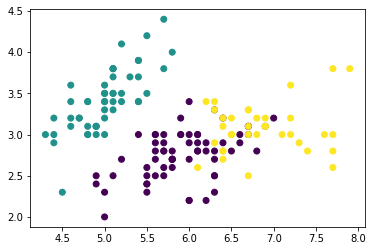

In [ ]:
 A = AgglomerativeClustering(n_clusters=k, linkage='average')
 A.fit(X)
 predicted_labels = A.labels_
 predicted_labels.shape
 plt.scatter(X[:, 0], X[:, 1], c=predicted_labels)
 plt.show()


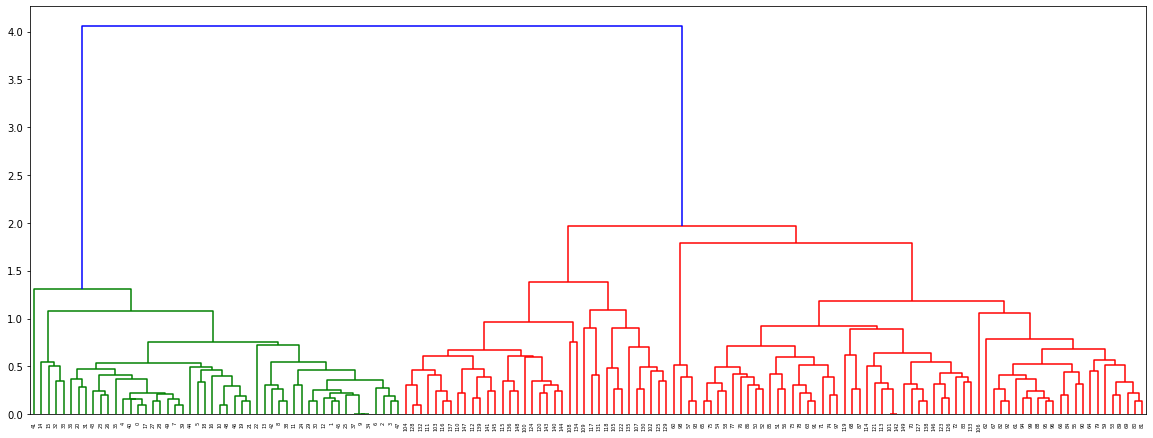

In [ ]:
link = linkage(X, method='average')
plt.figure(figsize=(20, 7.5))
dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
plt.show()

In [ ]:
def my_sl(X, k):
  N, f = X.shape
  clusters = [[i] for i in range(N)] 

  for iter in range(N, k, -1):
    min_pair = (0, 1)
    min_dist = -1

    #################

    for i in range(iter):
      for j in range(i + 1, iter):
        X_i, X_j = X[clusters[i]], X[clusters[j]]
        pair_dist_ij = distance.cdist(X_i, X_j)
        min_ij = pair_dist_ij.min()
        if min_dist == -1:
          min_dist = min_ij
          min_pair = (i, j)
        else:
          if min_ij < min_dist:
            min_pair = (i, j)
            min_dist = min_ij
      
    ###################
    i, j = min_pair
    clusters[i].extend(clusters[j])
    clusters.pop(j)
  
  return clusters

In [ ]:
clusters = my_sl(X, k)

In [ ]:
sl_predicted_labels = np.zeros(N)
for i in range(k):
  for point in clusters[i]:
    sl_predicted_labels[point] = i
sl_predicted_labels.shape

(150,)

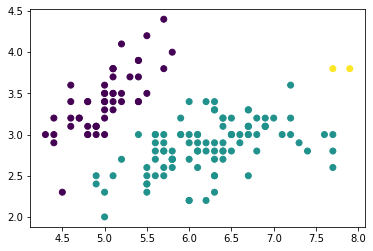

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=sl_predicted_labels)
plt.show()

In [ ]:
adjusted_rand_score(labels, predicted_labels), adjusted_rand_score(labels, sl_predicted_labels)

(0.7591987071071522, 0.5637510205230709)


**wine data **

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Real/wine.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
0,-276.29,173.08,131.16,840.69,106.43,-82.78,140.83,-11.83,-139.76,337.57,240.81,-107.51,32.25,201.04,122.56,43.00,-10.75,-37.63,170.93,351.54,94.60,-21.50,86.00,102.13,316.07,-17.20,-222.54,9871.14,195.66,400.99,175.23,222.54,337.57,221.46,1459.92,119.33,59.13,1309.42,274.14,820.27,...,305.32,333.27,110.73,509.58,1858.77,112.88,6121.35,44.08,54.83,258.01,528.93,585.90,-49.45,1019.15,2696.23,135.46,436.47,836.39,504.20,840.69,33.33,134.38,11.83,240.81,8917.57,-94.60,-159.11,1140.63,138.68,1927.57,474.10,117.18,99.98,464.42,-18.28,165.56,316.07,325.74,63.43,1
1,633.20,49.71,119.49,177.92,37.50,-87.22,118.62,1.74,63.67,336.66,320.96,-102.92,-7.85,131.70,75.88,59.31,17.44,-110.77,197.98,420.39,182.29,18.32,47.97,-75.01,320.09,72.39,-151.76,7766.77,56.69,305.26,153.50,102.92,88.96,280.84,1153.89,39.25,-0.87,1894.38,121.23,419.52,...,372.42,302.65,203.22,395.10,1618.77,102.05,-103.79,75.88,-2.62,237.23,183.16,313.11,-31.40,646.29,1764.42,156.99,139.55,18.32,513.71,552.96,45.35,119.49,48.84,142.17,2692.42,-111.64,-157.86,1803.67,124.72,1978.98,366.32,77.62,180.54,709.95,-55.82,245.08,307.88,40.99,12.21,1
2,295.43,219.10,85.26,286.51,194.31,-118.97,131.85,85.26,-205.22,417.37,175.48,-70.39,-34.70,184.40,37.67,62.46,29.74,-159.61,286.51,1857.86,49.57,-141.77,145.73,75.35,364.83,-3.97,-189.35,10526.54,166.55,503.62,151.68,86.25,70.39,357.89,1294.75,166.55,73.36,1671.48,262.72,1114.32,...,368.80,81.29,207.20,377.72,447.12,76.34,-92.20,93.19,87.24,285.52,283.54,302.37,-6.94,925.95,2835.36,124.91,340.05,1548.55,640.44,1083.59,51.55,137.80,57.50,302.37,3237.87,-107.07,-130.86,888.28,115.00,1513.85,728.67,204.23,132.85,428.28,5.95,47.59,517.50,239.92,67.41,1
3,61.89,112.05,108.84,311.59,71.50,-51.22,159.00,76.83,-21.34,478.06,176.07,-33.08,-54.42,167.53,69.36,93.90,26.68,-51.22,209.15,897.43,54.42,17.07,107.78,45.89,287.05,-13.87,-135.52,8973.21,544.22,317.99,182.47,192.08,66.16,181.41,1255.97,144.06,193.14,6836.89,253.97,786.45,...,329.73,78.97,67.23,442.84,786.45,46.95,-38.42,23.48,2.13,205.95,1148.20,1859.95,-4.27,823.80,8642.41,247.57,314.79,1661.47,2351.88,3616.39,7.47,343.61,18.14,182.47,6634.14,-123.78,-110.98,1233.56,212.35,2030.68,374.55,147.26,135.52,734.16,51.22,81.10,295.59,64.03,25.61,1
4,-33.87,59.77,92.64,568.79,71.72,391.48,35.86,1.00,38.85,513.00,215.16,-58.77,-6.97,130.49,78.69,40.84,21.91,164.36,132.48,3082.00,134.48,9.96,47.81,44.83,170.34,-18.93,-74.71,12276.22,441.28,176.31,96.62,210.18,74.71,196.24,603.65,46.82,73.71,2711.45,154.40,2138.68,...,238.07,117.54,91.64,433.31,809.85,60.76,-87.66,44.83,9.96,138.46,858.66,1118.65,-25.90,1126.61,6234.73,490.09,242.06,1481.23,1197.34,2233.31,-6.97,209.19,-1.00,72.72,4339.11,-108.58,-84.67,-81.68,218.15,1103.70,369.56,218.15,104.59,316.77,-50.80,285.89,194.24,86.66,63.75,1


In [ ]:
df_X, labels = df.iloc[:, :-1], df.iloc[:, -1]
X, labels = np.array(df_X), np.array(labels)
X.shape, labels.shape

((103, 1000), (103,))

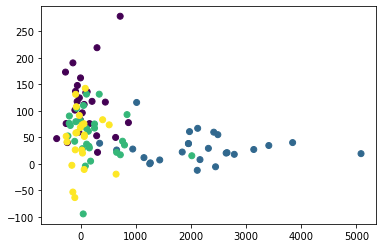

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

In [ ]:
N, f = X.shape
k = len(set(labels))

for single linkage

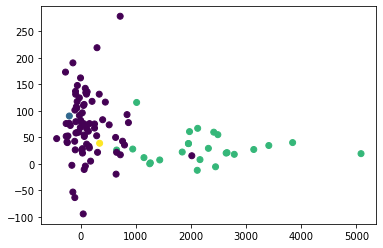

In [ ]:
S = AgglomerativeClustering(n_clusters=k, linkage='single')
S.fit(X)
predicted_labels = S.labels_
predicted_labels.shape
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels)
plt.show()

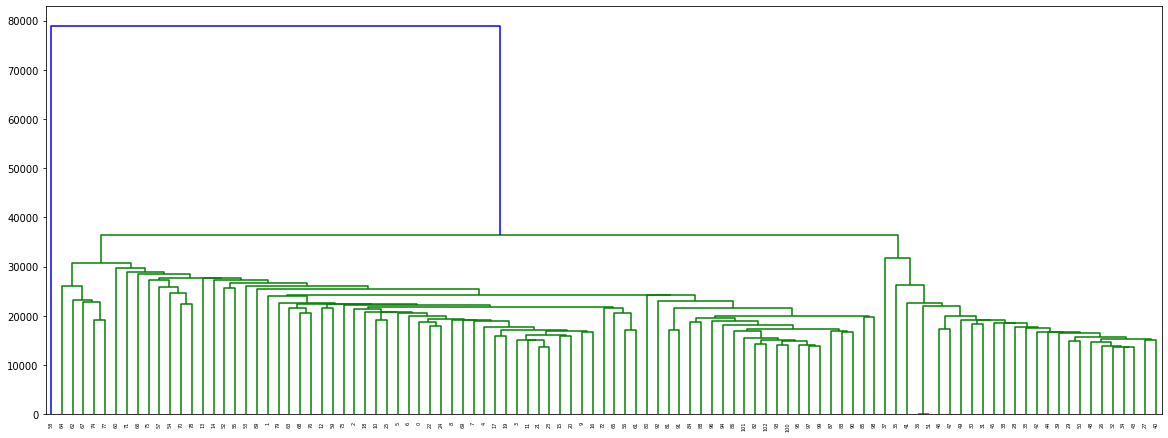

In [ ]:
link = linkage(X, method='single')
plt.figure(figsize=(20, 7.5))
dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
plt.show()

for complete linkage 

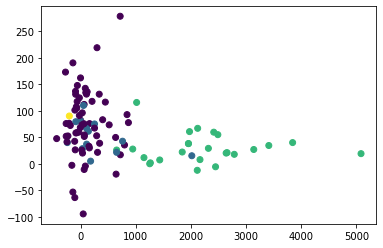

In [ ]:
 C = AgglomerativeClustering(n_clusters=k, linkage='complete')
 C.fit(X)
 predicted_labels = C.labels_
 predicted_labels.shape
 plt.scatter(X[:, 0], X[:, 1], c=predicted_labels)
 plt.show()

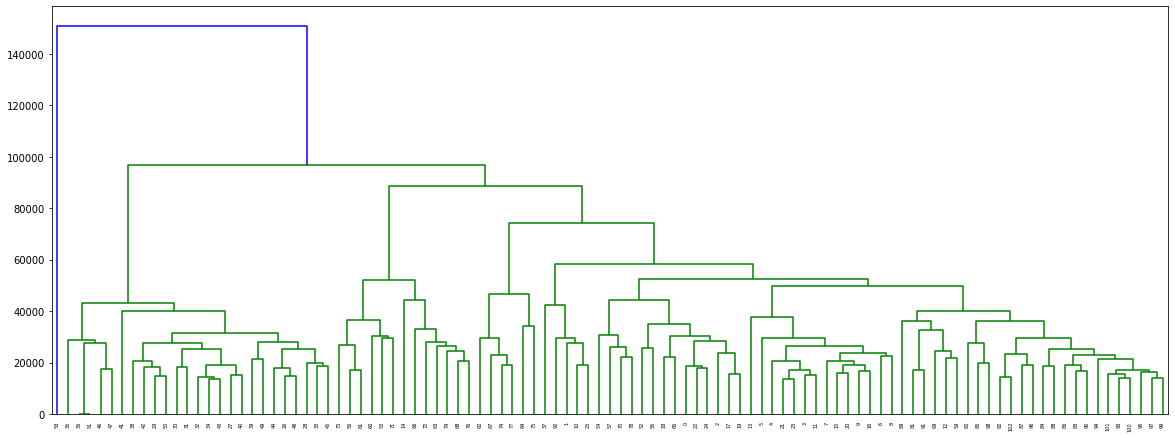

In [ ]:
link = linkage(X, method='complete')
plt.figure(figsize=(20, 7.5))
dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
plt.show()

for average linkage

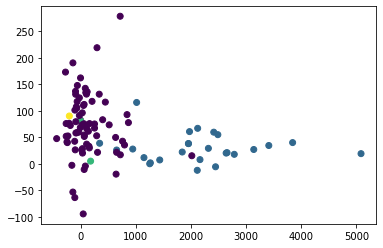

In [ ]:
 A = AgglomerativeClustering(n_clusters=k, linkage='average')
 A.fit(X)
 predicted_labels = A.labels_
 predicted_labels.shape
 plt.scatter(X[:, 0], X[:, 1], c=predicted_labels)
 plt.show()

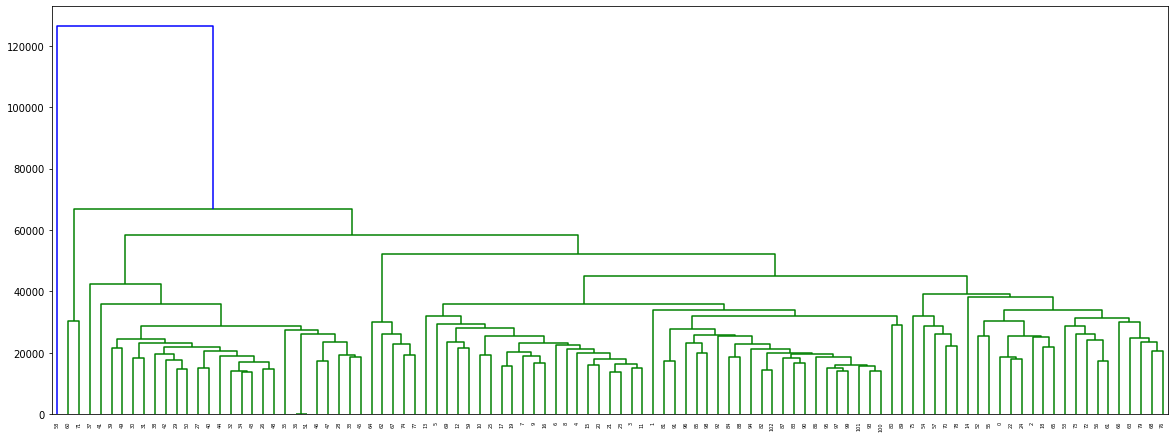

In [ ]:
link = linkage(X, method='average')
plt.figure(figsize=(20, 7.5))
dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
plt.show()

In [ ]:
def my_sl(X, k):
  N, f = X.shape
  clusters = [[i] for i in range(N)] 

  for iter in range(N, k, -1):
    min_pair = (0, 1)
    min_dist = -1

    #################

    for i in range(iter):
      for j in range(i + 1, iter):
        X_i, X_j = X[clusters[i]], X[clusters[j]]
        pair_dist_ij = distance.cdist(X_i, X_j)
        min_ij = pair_dist_ij.min()
        if min_dist == -1:
          min_dist = min_ij
          min_pair = (i, j)
        else:
          if min_ij < min_dist:
            min_pair = (i, j)
            min_dist = min_ij
      
    ###################
    i, j = min_pair
    clusters[i].extend(clusters[j])
    clusters.pop(j)
  
  return clusters

In [ ]:
clusters = my_sl(X, k)

In [ ]:
sl_predicted_labels = np.zeros(N)
for i in range(k):
  for point in clusters[i]:
    sl_predicted_labels[point] = i
sl_predicted_labels.shape

(103,)

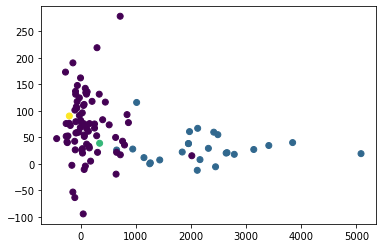

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=sl_predicted_labels)
plt.show()

In [ ]:
adjusted_rand_score(labels, predicted_labels), adjusted_rand_score(labels, sl_predicted_labels)

(0.3290172944083094, 0.3184043029005554)

Synthetic dataset


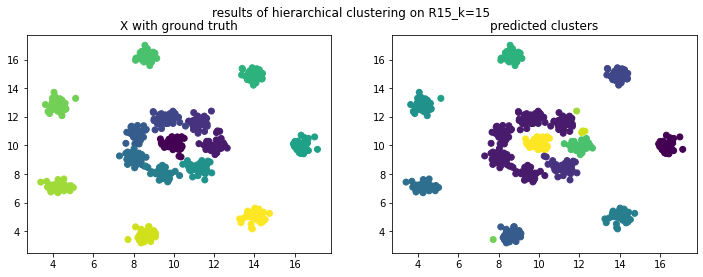

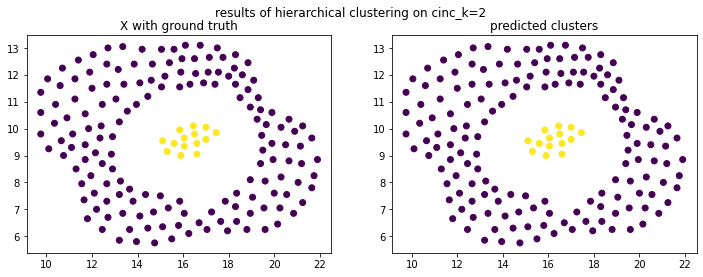

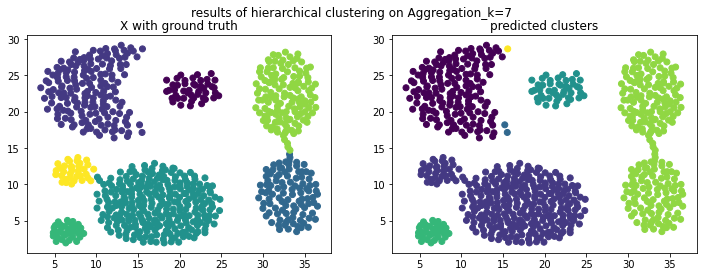

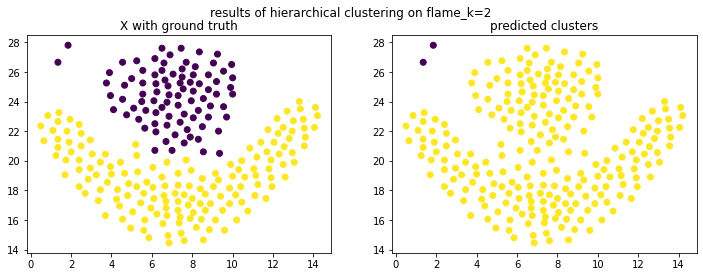

In [ ]:
for file in [ 'R15_k=15.txt', 'cinc_k=2.txt','Aggregation_k=7.txt', 'flame_k=2.txt']:
  sep = "\t"
  link = 'single'

  #if file in ['cinc_k=2.txt']:
   # link = "average"
  
  df = pd.read_csv(base_path + 'Synthetic/' + file, sep=sep, header=None)
  X, labels = df.iloc[:, :-1], df.iloc[:, -1]
  X, labels = np.array(X), np.array(labels, dtype=int)
  k = len(set(labels))
  N, f = X.shape  
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))
  fig.suptitle("results of hierarchical clustering on " + file[:-4])
  ax[0].set_title('X with ground truth')
  ax[0].scatter(X[:, 0], X[:, 1], c=labels)

  hierarchical = AgglomerativeClustering(n_clusters=k, linkage=link).fit(X)
  predicted_labels = hierarchical.labels_

  ax[1].scatter(X[:, 0], X[:, 1], c=predicted_labels)
  # ari = round(adjusted_rand_score(labels, predicted_labels), 4)
  ax[1].set_title('predicted clusters')
  plt.show()
  print('\n')


linkage on synthetic datasets
(single,complete,averge)
and Dendogram

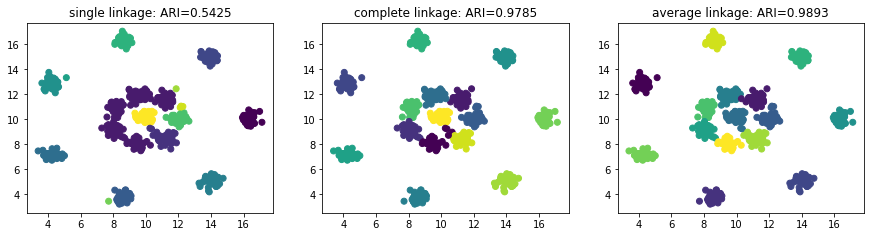

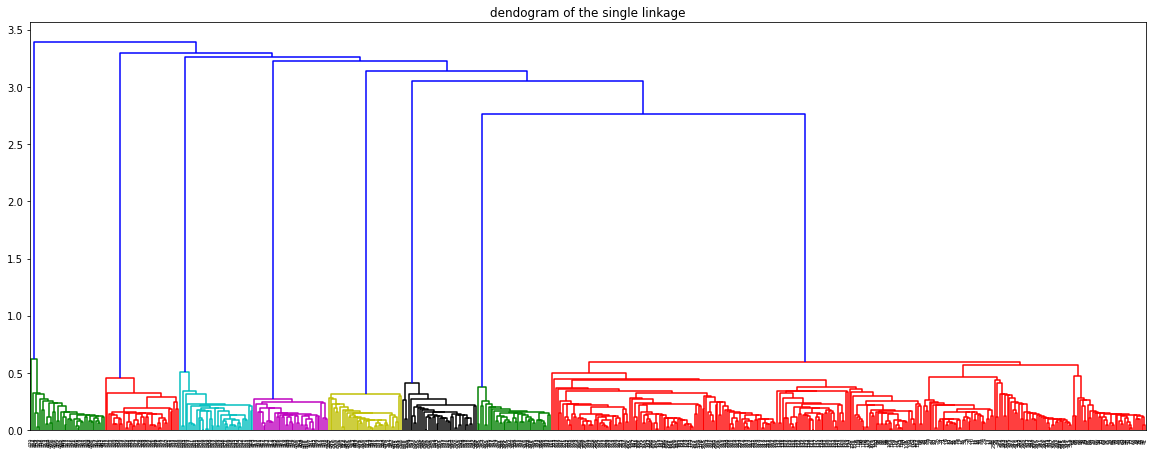

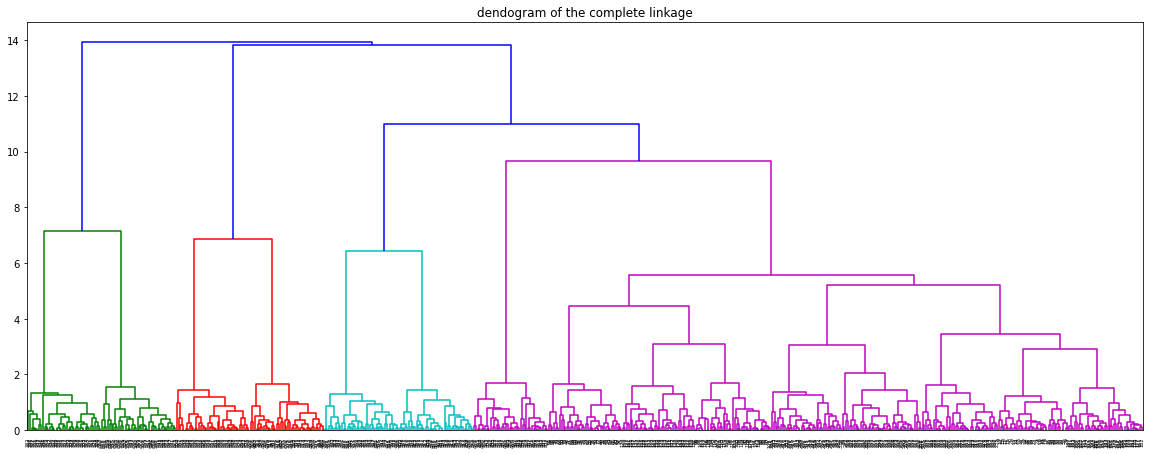

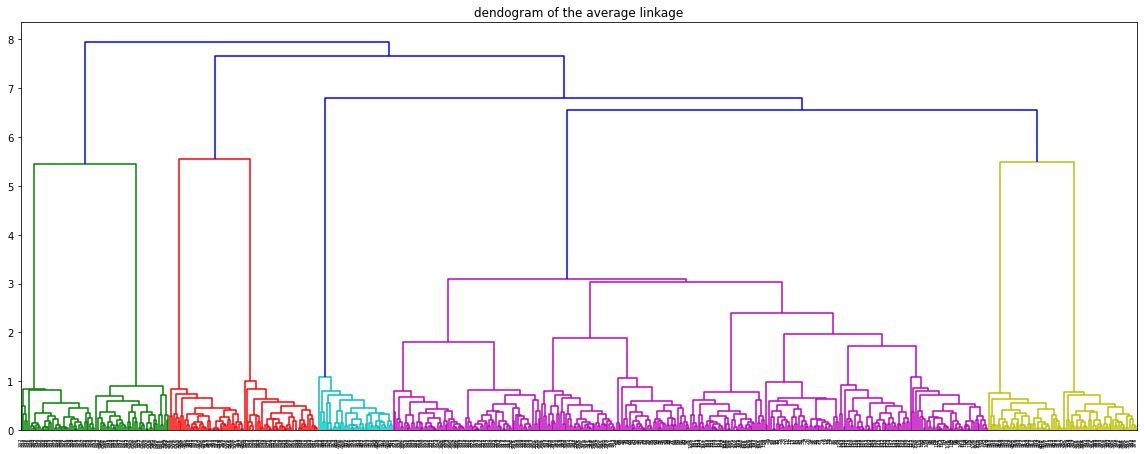

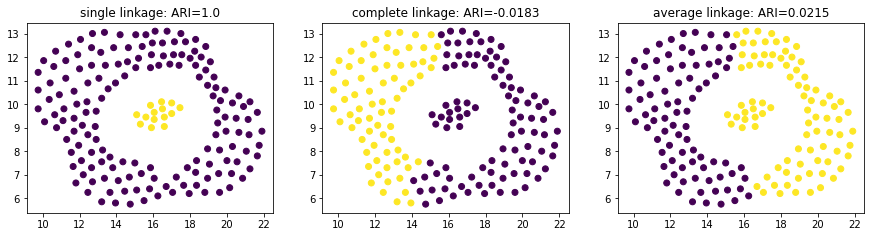

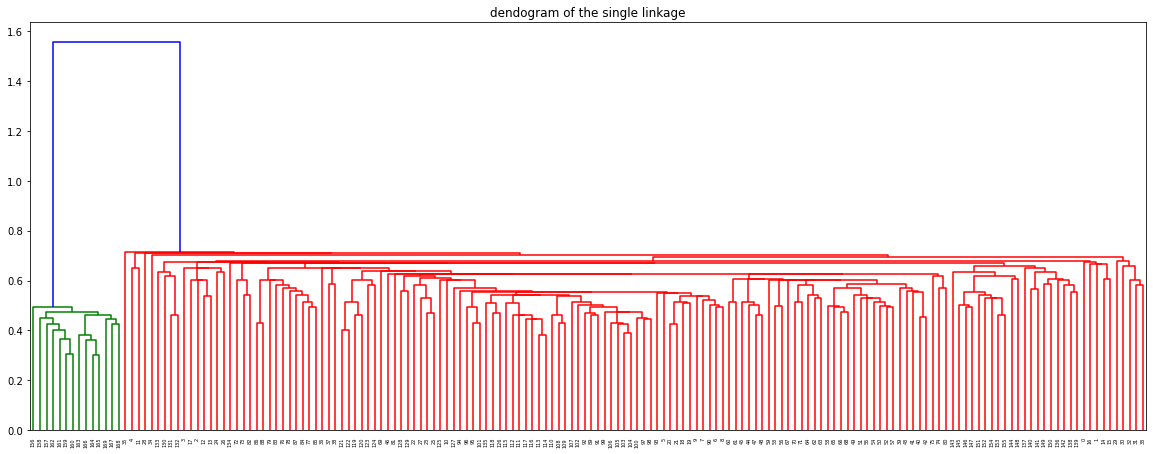

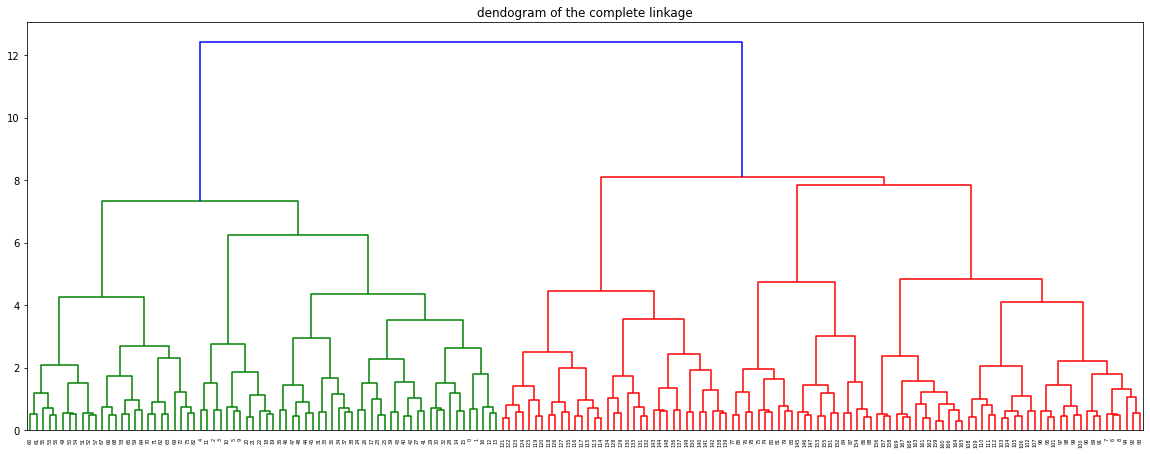

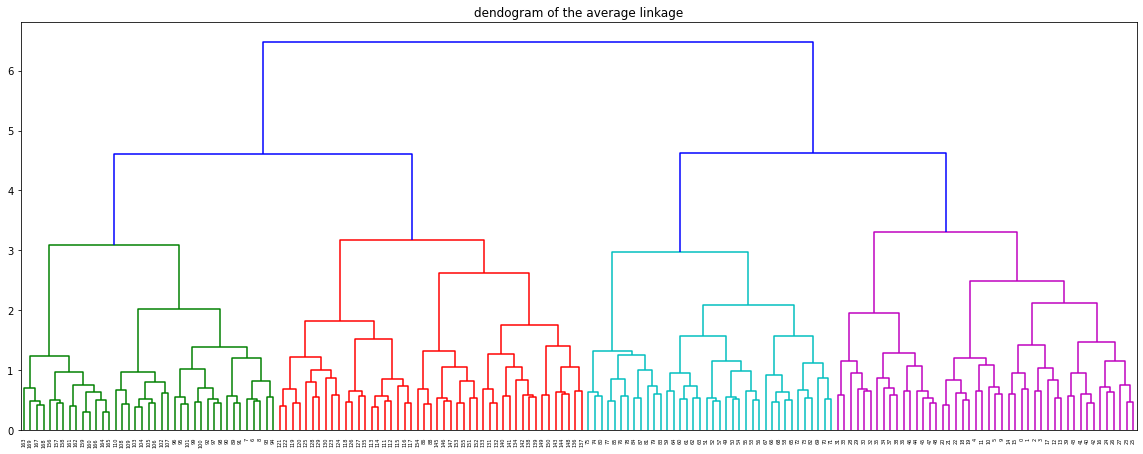

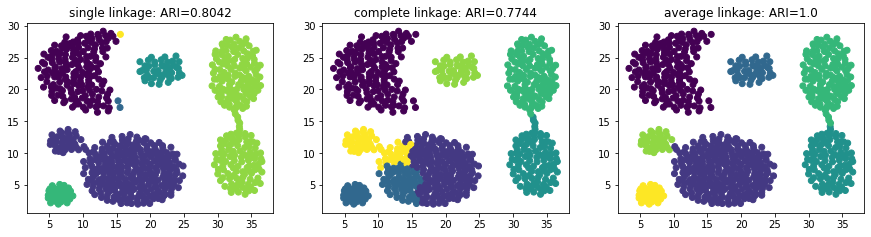

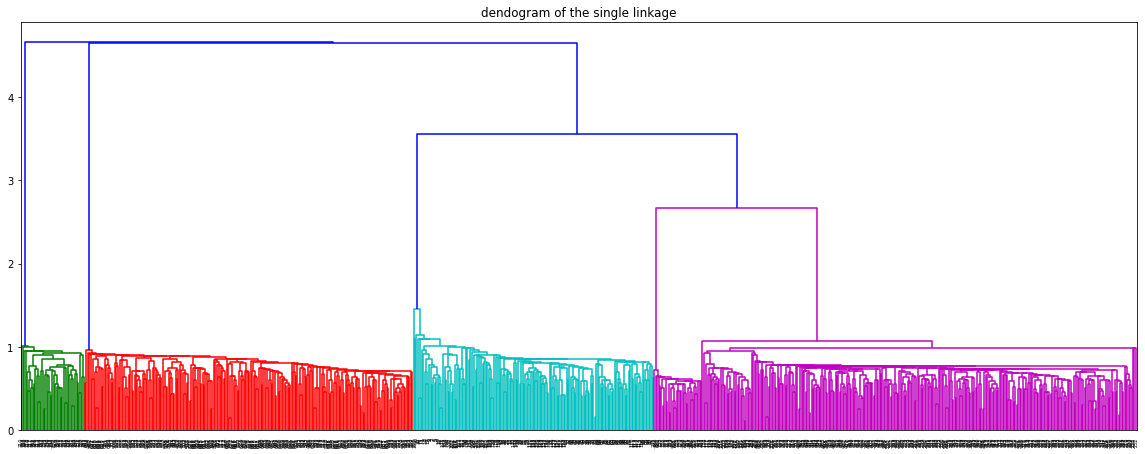

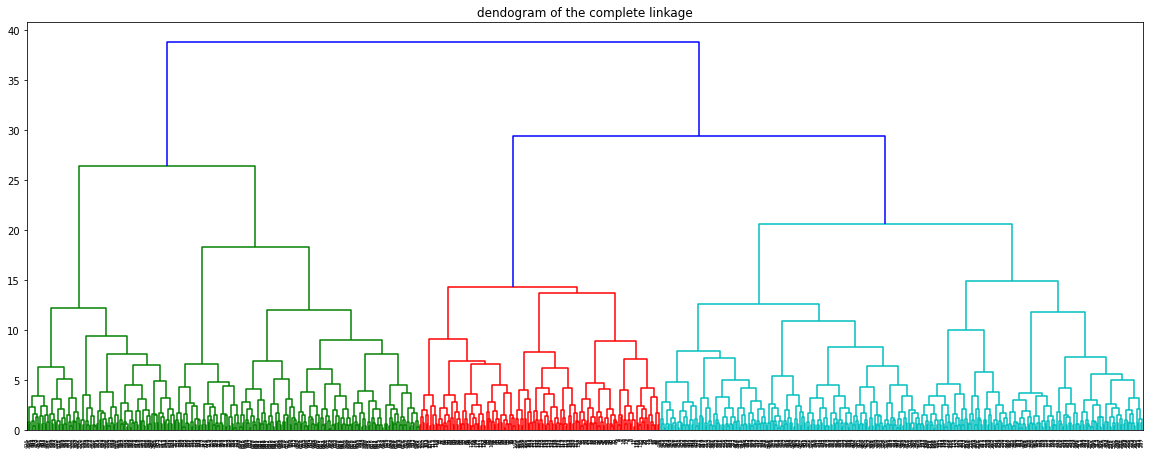

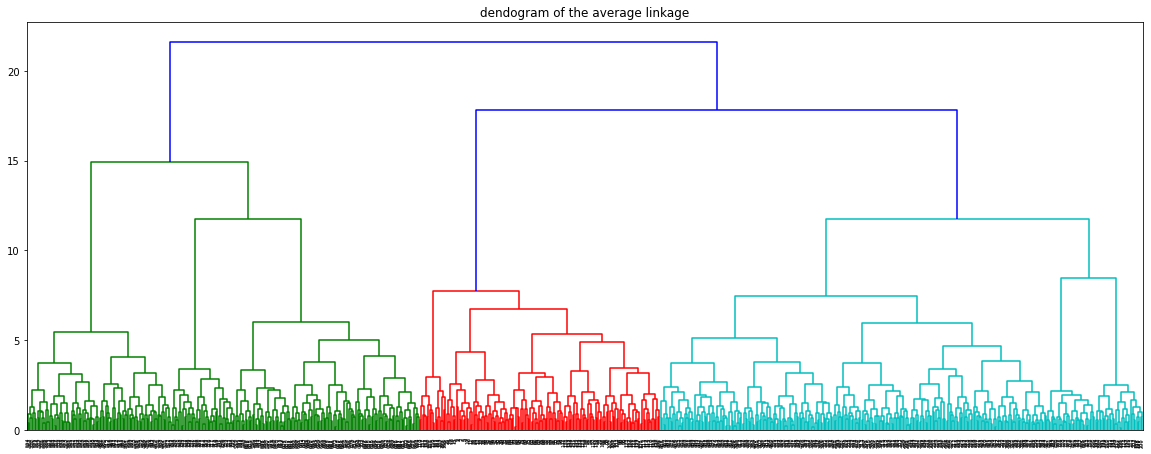

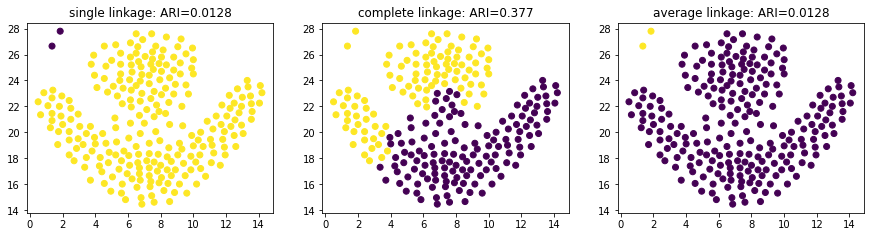

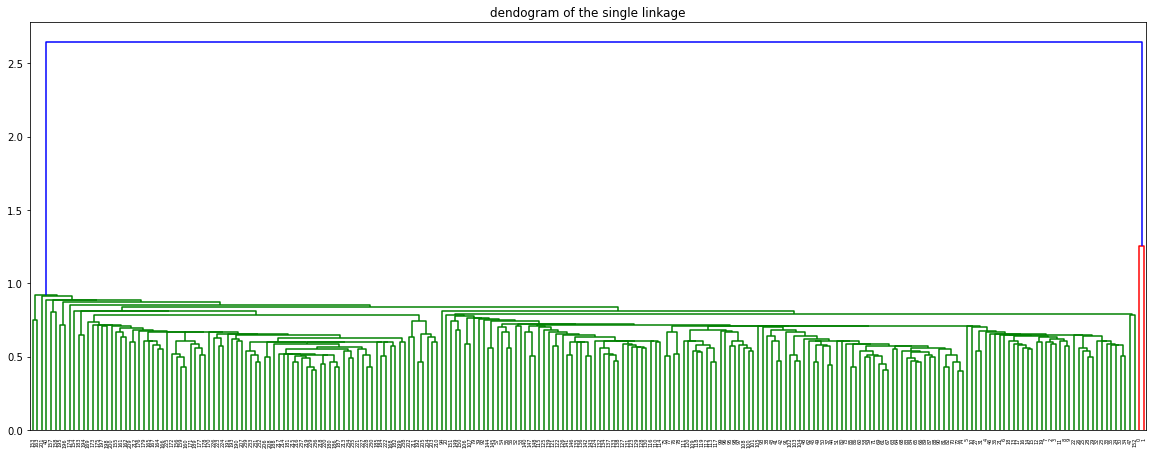

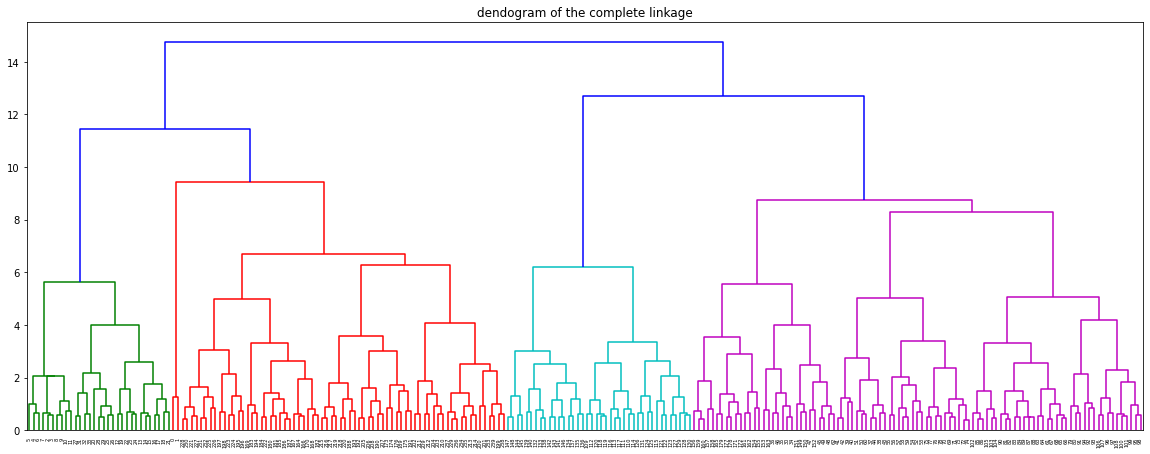

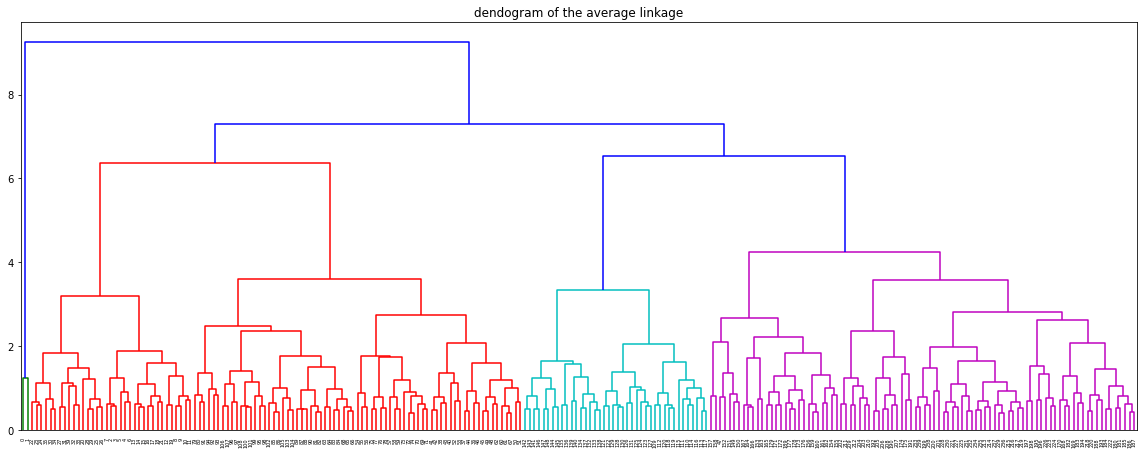

In [ ]:
for file in [ 'R15_k=15.txt','cinc_k=2.txt', 'Aggregation_k=7.txt', 'flame_k=2.txt']:
  sep = "\t"
  
  df = pd.read_csv(base_path + 'Synthetic/' + file, sep=sep, header=None)
  X, labels = df.iloc[:, :-1], df.iloc[:, -1]
  X, labels = np.array(X), np.array(labels, dtype=int)
  k = len(set(labels))
  N, f = X.shape
  
  fig, ax = plt.subplots(1, 3, figsize=(15, 3.5))

  hierarchical_sl = AgglomerativeClustering(n_clusters=k, linkage='single').fit(X)
  predicted_labels_sl = hierarchical_sl.labels_
  ax[0].scatter(X[:, 0], X[:, 1], c=predicted_labels_sl)
  ari = round(adjusted_rand_score(labels, predicted_labels_sl), 4)
  ax[0].set_title('single linkage: ARI='+str(ari))
  link = linkage(X, method='single')
  plt.figure(figsize=(20, 7.5))
  dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
  plt.title('dendogram of the single linkage')


  hierarchical_cl = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X)
  predicted_labels_cl = hierarchical_cl.labels_
  ax[1].scatter(X[:, 0], X[:, 1], c=predicted_labels_cl)
  ari = round(adjusted_rand_score(labels, predicted_labels_cl), 4)
  ax[1].set_title('complete linkage: ARI='+str(ari))
  link = linkage(X, method='complete')
  plt.figure(figsize=(20, 7.5))
  dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
  plt.title('dendogram of the complete linkage')

  hierarchical_al = AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)
  predicted_labels_al = hierarchical_al.labels_
  ax[2].scatter(X[:, 0], X[:, 1], c=predicted_labels_al)
  ari = round(adjusted_rand_score(labels, predicted_labels_al), 4)
  ax[2].set_title('average linkage: ARI='+str(ari))
  link = linkage(X, method='average')
  plt.figure(figsize=(20, 7.5))
  dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
  plt.title('dendogram of the average linkage')


  
  plt.show()

In [ ]:
 ari_arr = []
for file in [ 'R15_k=15.txt','cinc_k=2.txt' , 'Aggregation_k=7.txt', 'flame_k=2.txt']:
  sep = "\t"
  link = 'single'
  df = pd.read_csv(base_path + 'Synthetic/' + file, sep=sep, header=None)
  X, labels = df.iloc[:, :-1], df.iloc[:, -1]
  X, labels = np.array(X), np.array(labels, dtype=int)
  k = len(set(labels))
  N, f = X.shape
  
  hierarchical_sl = AgglomerativeClustering(n_clusters=k, linkage='single').fit(X)
  predicted_labels_sl = hierarchical_sl.labels_
  ari_sl = round(adjusted_rand_score(labels, predicted_labels_sl), 4)

  hierarchical_cl = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X)
  predicted_labels_cl = hierarchical_cl.labels_
  ari_cl = round(adjusted_rand_score(labels, predicted_labels_cl), 4)

  hierarchical_al = AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)
  predicted_labels_al = hierarchical_al.labels_
  ari_al = round(adjusted_rand_score(labels, predicted_labels_al), 4)

  ari_arr.append([file[:-4], ari_sl, ari_cl, ari_al])

Result on Synthetic datasets

In [ ]:
ari_df = pd.DataFrame(ari_arr, columns=['dataset', 'single', 'complete', 'average'])
ari_df

,dataset,single,complete,average
0,cinc_k=2,1.0000,-0.0183,0.0215
1,flame_k=2,0.0128,0.3770,0.0128
2,R15_k=15,0.5425,0.9785,0.9893
3,Aggregation_k=7,0.8042,0.7744,1.0000


GENE EXPRESSION DATASETS


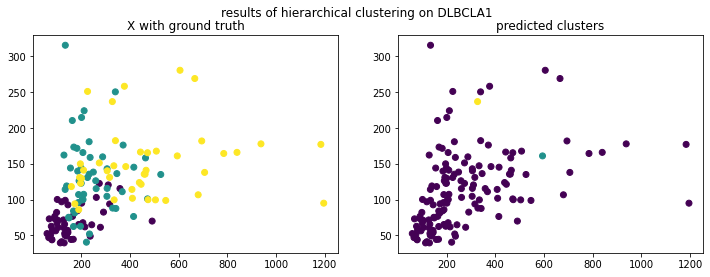

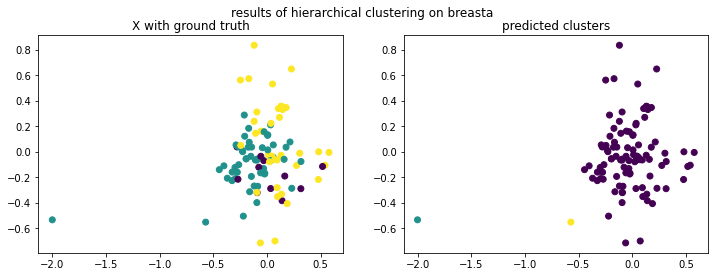

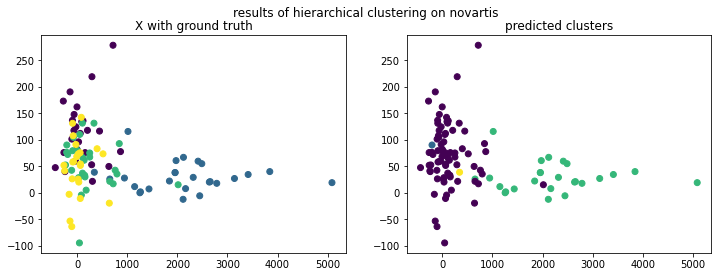

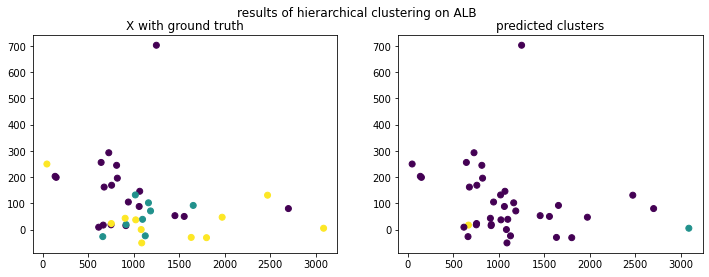

In [ ]:
for file in [  'DLBCLA1.txt', 'breasta.txt', 'novartis.txt','ALB.txt']:
  sep = "\t"
  link = 'single'
  df = pd.read_csv(base_path + 'Gene Expression/' + file, sep=sep, header=None)
  X, labels = df.iloc[:, :-1], df.iloc[:, -1]
  X, labels = np.array(X), np.array(labels, dtype=int)
  k = len(set(labels))
  N, f = X.shape  
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))
  fig.suptitle("results of hierarchical clustering on " + file[:-4])
  ax[0].set_title('X with ground truth')
  ax[0].scatter(X[:, 0], X[:, 1], c=labels)

  hierarchical = AgglomerativeClustering(n_clusters=k, linkage=link).fit(X)
  predicted_labels = hierarchical.labels_

  ax[1].scatter(X[:, 0], X[:, 1], c=predicted_labels)
  # ari = round(adjusted_rand_score(labels, predicted_labels), 4)
  ax[1].set_title('predicted clusters')
  plt.show()
  print('\n')


linkage on Gene Expression datasets (single,complete,averge) and dandograms

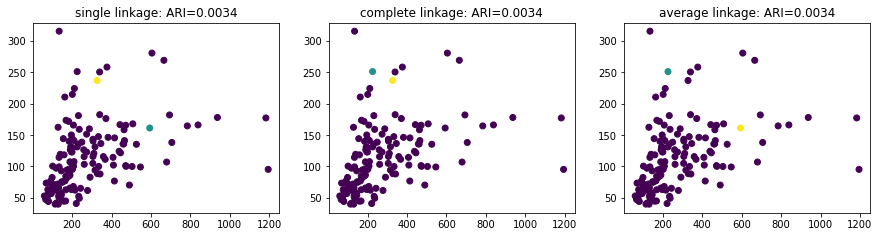

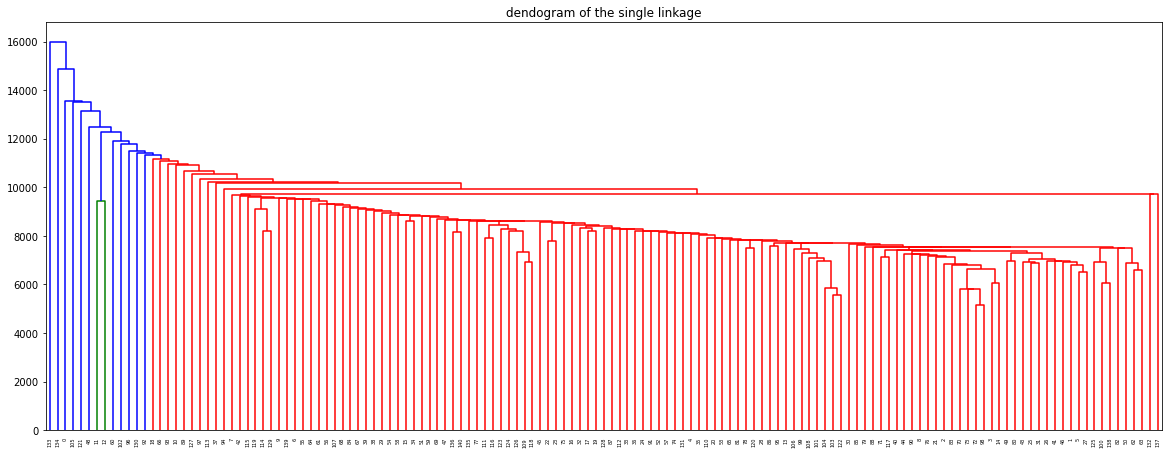

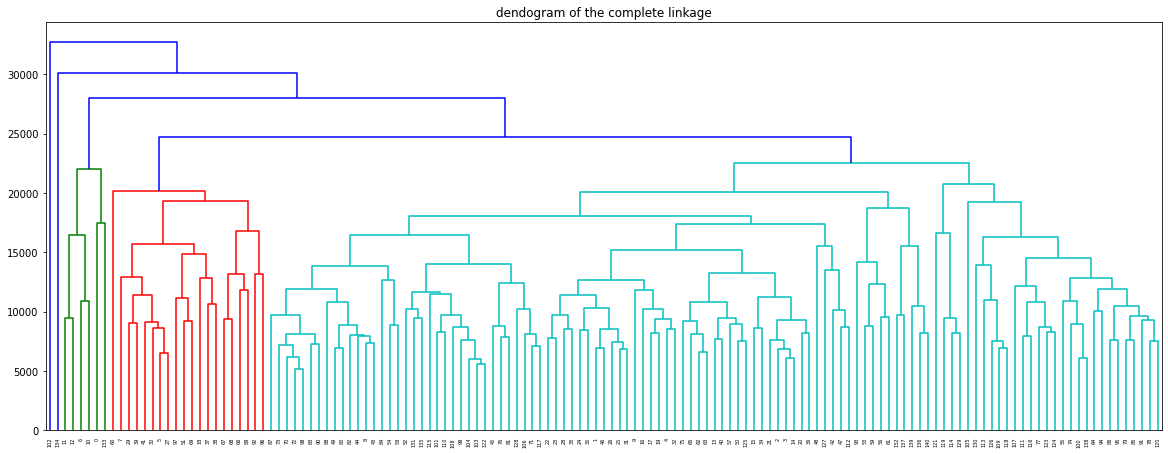

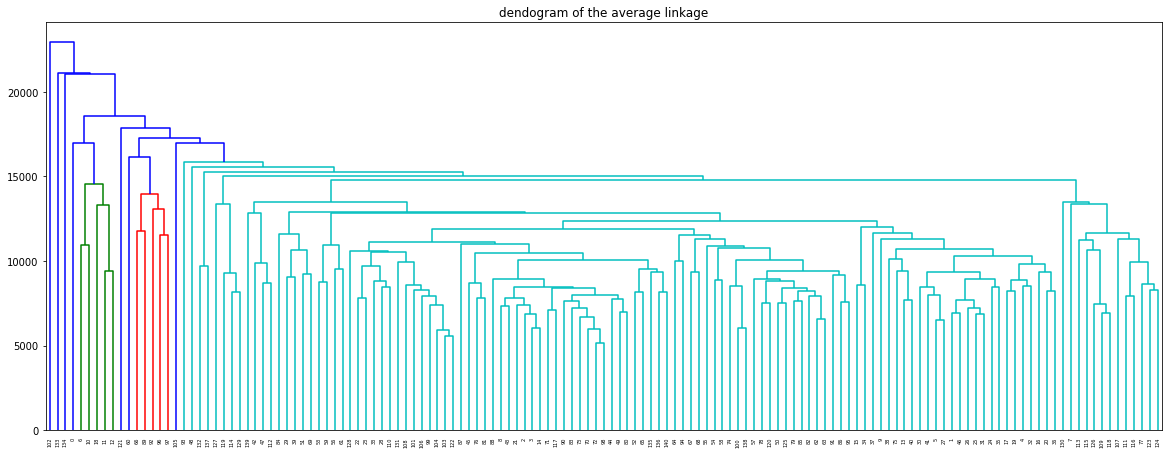

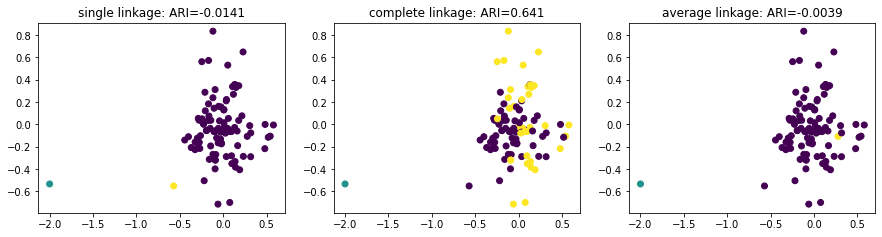

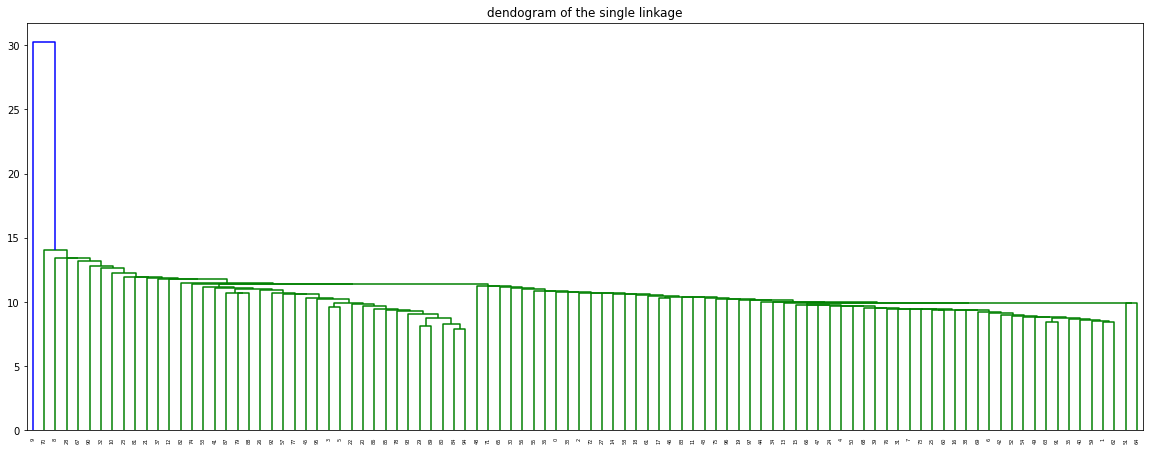

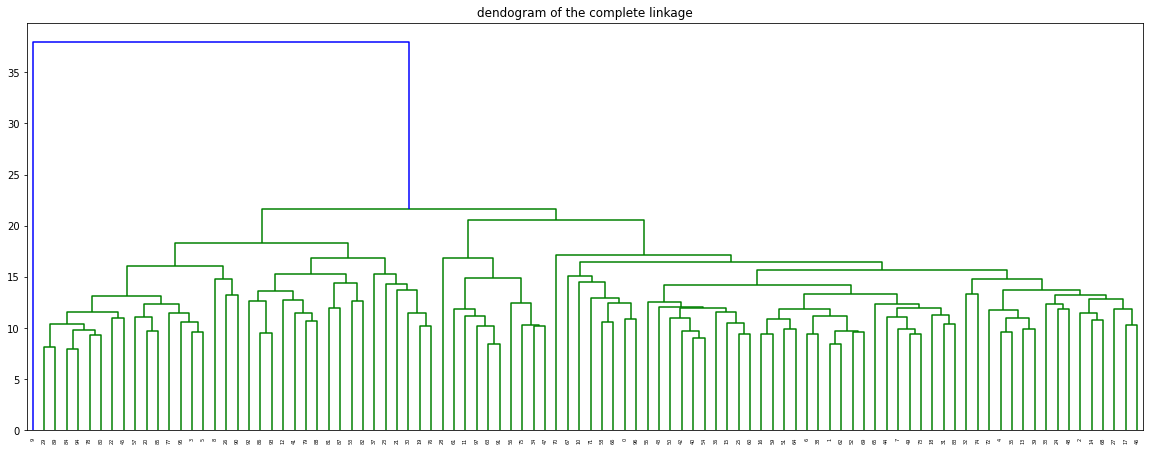

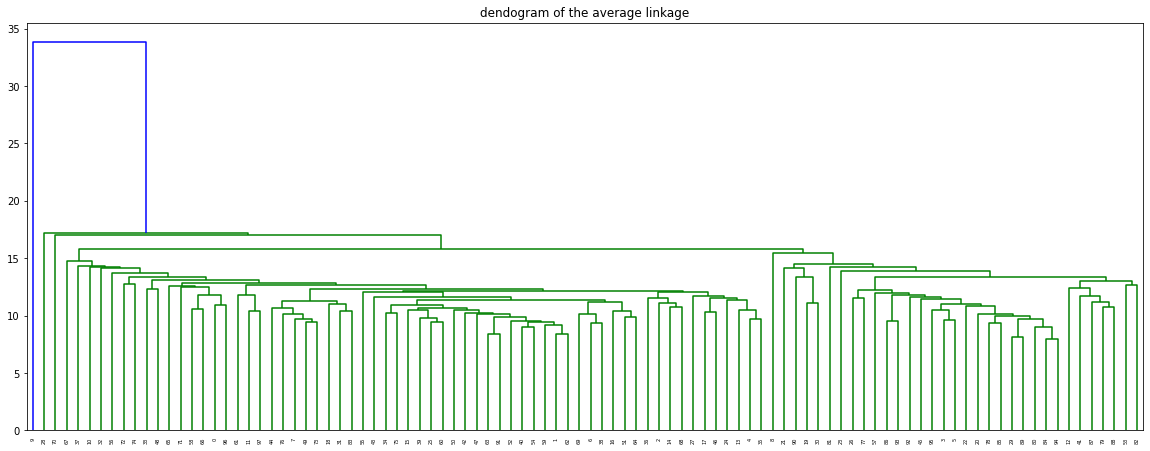

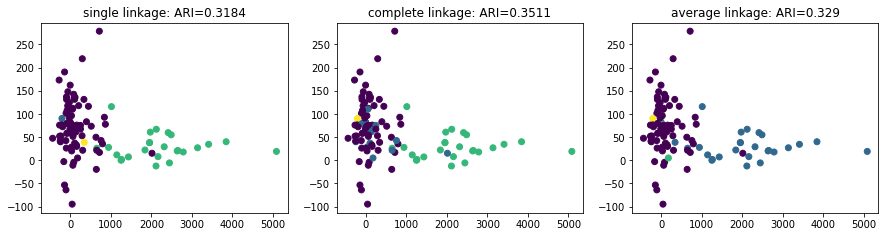

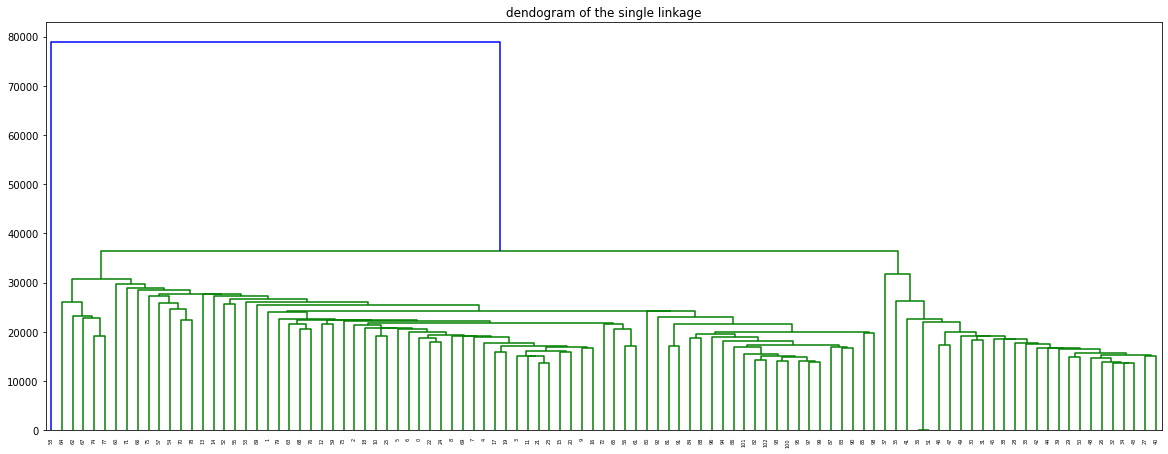

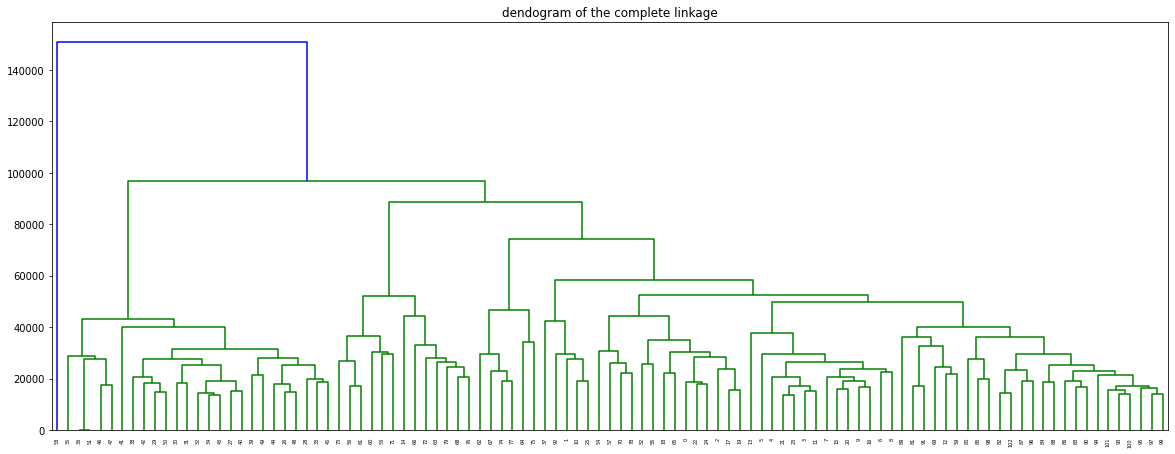

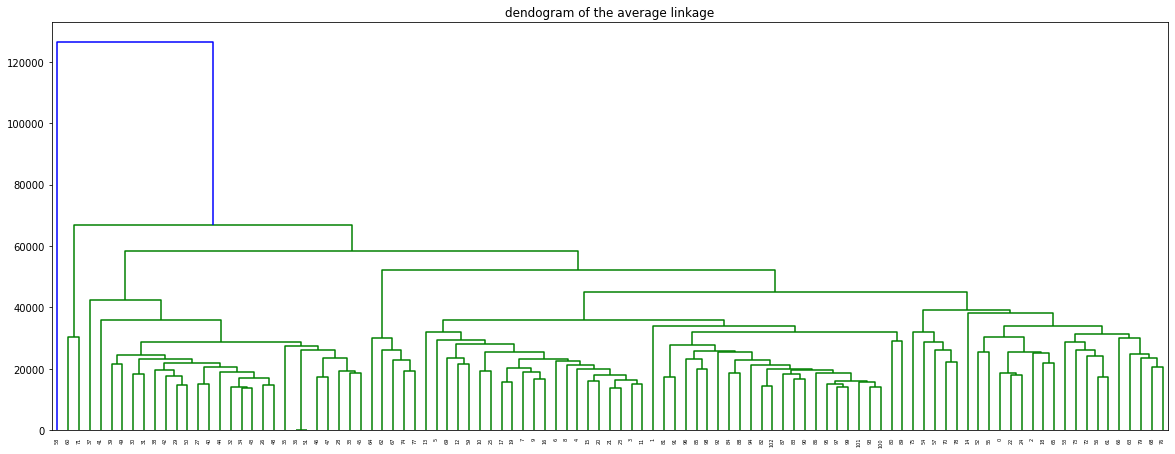

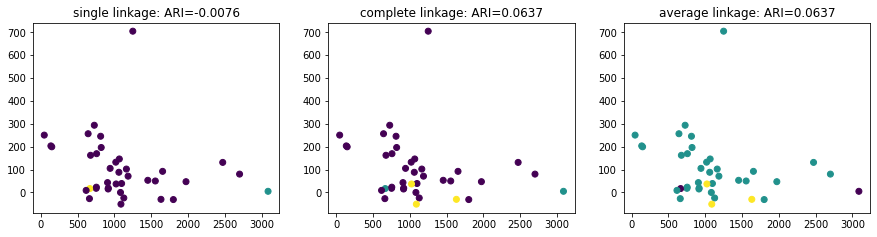

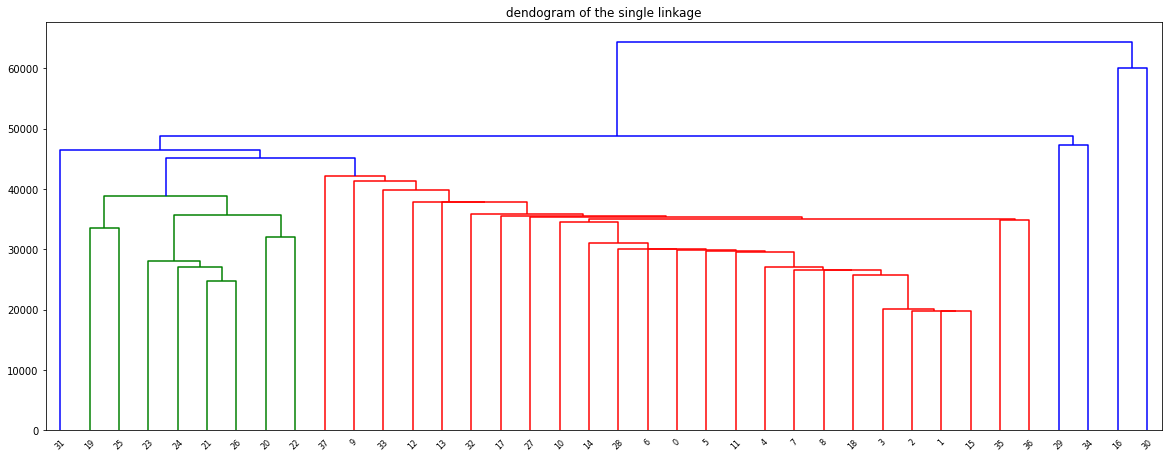

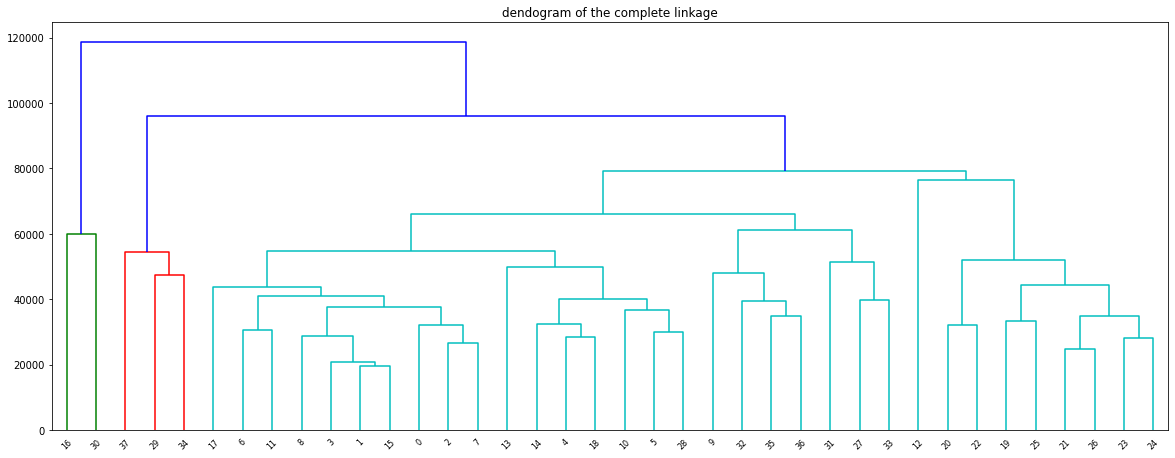

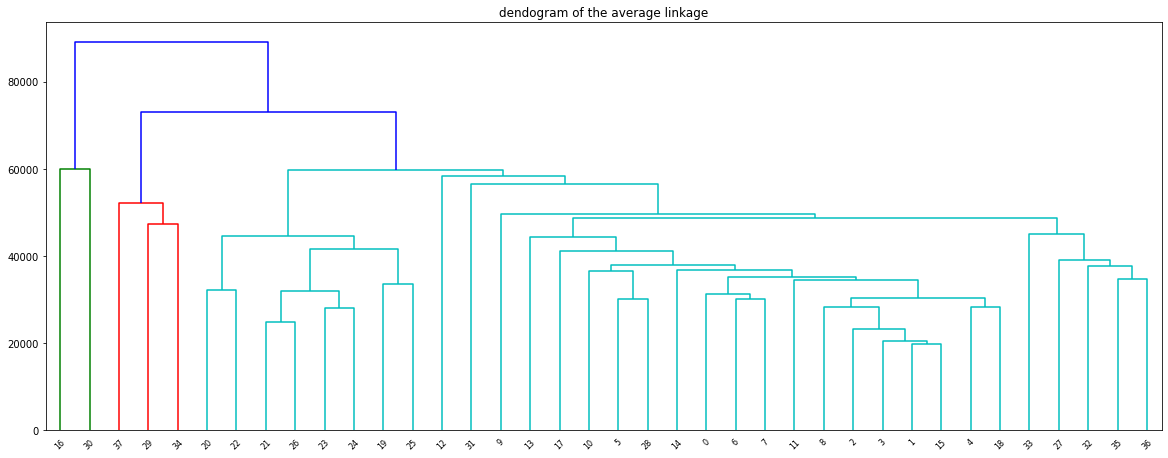

In [ ]:
for file in [ 'DLBCLA1.txt', 'breasta.txt', 'novartis.txt','ALB.txt']:
  sep = "\t"
  
  df = pd.read_csv(base_path + 'Gene Expression/' + file, sep=sep, header=None)
  X, labels = df.iloc[:, :-1], df.iloc[:, -1]
  X, labels = np.array(X), np.array(labels, dtype=int)
  k = len(set(labels))
  N, f = X.shape
  
  fig, ax = plt.subplots(1, 3, figsize=(15, 3.5))

  hierarchical_sl = AgglomerativeClustering(n_clusters=k, linkage='single').fit(X)
  predicted_labels_sl = hierarchical_sl.labels_
  ax[0].scatter(X[:, 0], X[:, 1], c=predicted_labels_sl)
  ari = round(adjusted_rand_score(labels, predicted_labels_sl), 4)
  ax[0].set_title('single linkage: ARI='+str(ari))
  link = linkage(X, method='single')
  plt.figure(figsize=(20, 7.5))
  dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
  plt.title('dendogram of the single linkage')

  hierarchical_cl = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X)
  predicted_labels_cl = hierarchical_cl.labels_
  ax[1].scatter(X[:, 0], X[:, 1], c=predicted_labels_cl)
  ari = round(adjusted_rand_score(labels, predicted_labels_cl), 4)
  ax[1].set_title('complete linkage: ARI='+str(ari))
  link = linkage(X, method='complete')
  plt.figure(figsize=(20, 7.5))
  dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
  plt.title('dendogram of the complete linkage')

  hierarchical_al = AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)
  predicted_labels_al = hierarchical_al.labels_
  ax[2].scatter(X[:, 0], X[:, 1], c=predicted_labels_al)
  ari = round(adjusted_rand_score(labels, predicted_labels_al), 4)
  ax[2].set_title('average linkage: ARI='+str(ari))
  link = linkage(X, method='average')
  plt.figure(figsize=(20, 7.5))
  dendrogram(link, labels=range(N), orientation='top', show_leaf_counts=True)
  plt.title('dendogram of the average linkage')

  
  plt.show()

Results on Gene Datasets

In [ ]:
 ari_arr = []
for file in [ 'DLBCLA1.txt', 'breasta.txt', 'novartis.txt','ALB.txt']:
  sep = "\t"
  #link = 'single'
  df = pd.read_csv(base_path + 'Gene Expression/' + file, sep=sep, header=None)
  X, labels = df.iloc[:, :-1], df.iloc[:, -1]
  X, labels = np.array(X), np.array(labels, dtype=int)
  k = len(set(labels))
  N, f = X.shape
  
  hierarchical_sl = AgglomerativeClustering(n_clusters=k, linkage='single').fit(X)
  predicted_labels_sl = hierarchical_sl.labels_
  ari_sl = round(adjusted_rand_score(labels, predicted_labels_sl), 4)

  hierarchical_cl = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X)
  predicted_labels_cl = hierarchical_cl.labels_
  ari_cl = round(adjusted_rand_score(labels, predicted_labels_cl), 4)

  hierarchical_al = AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)
  predicted_labels_al = hierarchical_al.labels_
  ari_al = round(adjusted_rand_score(labels, predicted_labels_al), 4)

  ari_arr.append([file[:-4], ari_sl, ari_cl, ari_al])

In [ ]:
ari_df = pd.DataFrame(ari_arr, columns=['dataset', 'single', 'complete', 'average'])
ari_df

,dataset,single,complete,average
0,DLBCLA1,0.0034,0.0034,0.0034
1,breasta,-0.0141,0.6410,-0.0039
2,novartis,0.3184,0.3511,0.3290
3,ALB,-0.0076,0.0637,0.0637
